# **Random Forest**

## **1. Exploratory Data Analysis (EDA):**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_excel('/content/glass.xlsx', sheet_name = 'glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [84]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [85]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [86]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## **2: Data Visualization**

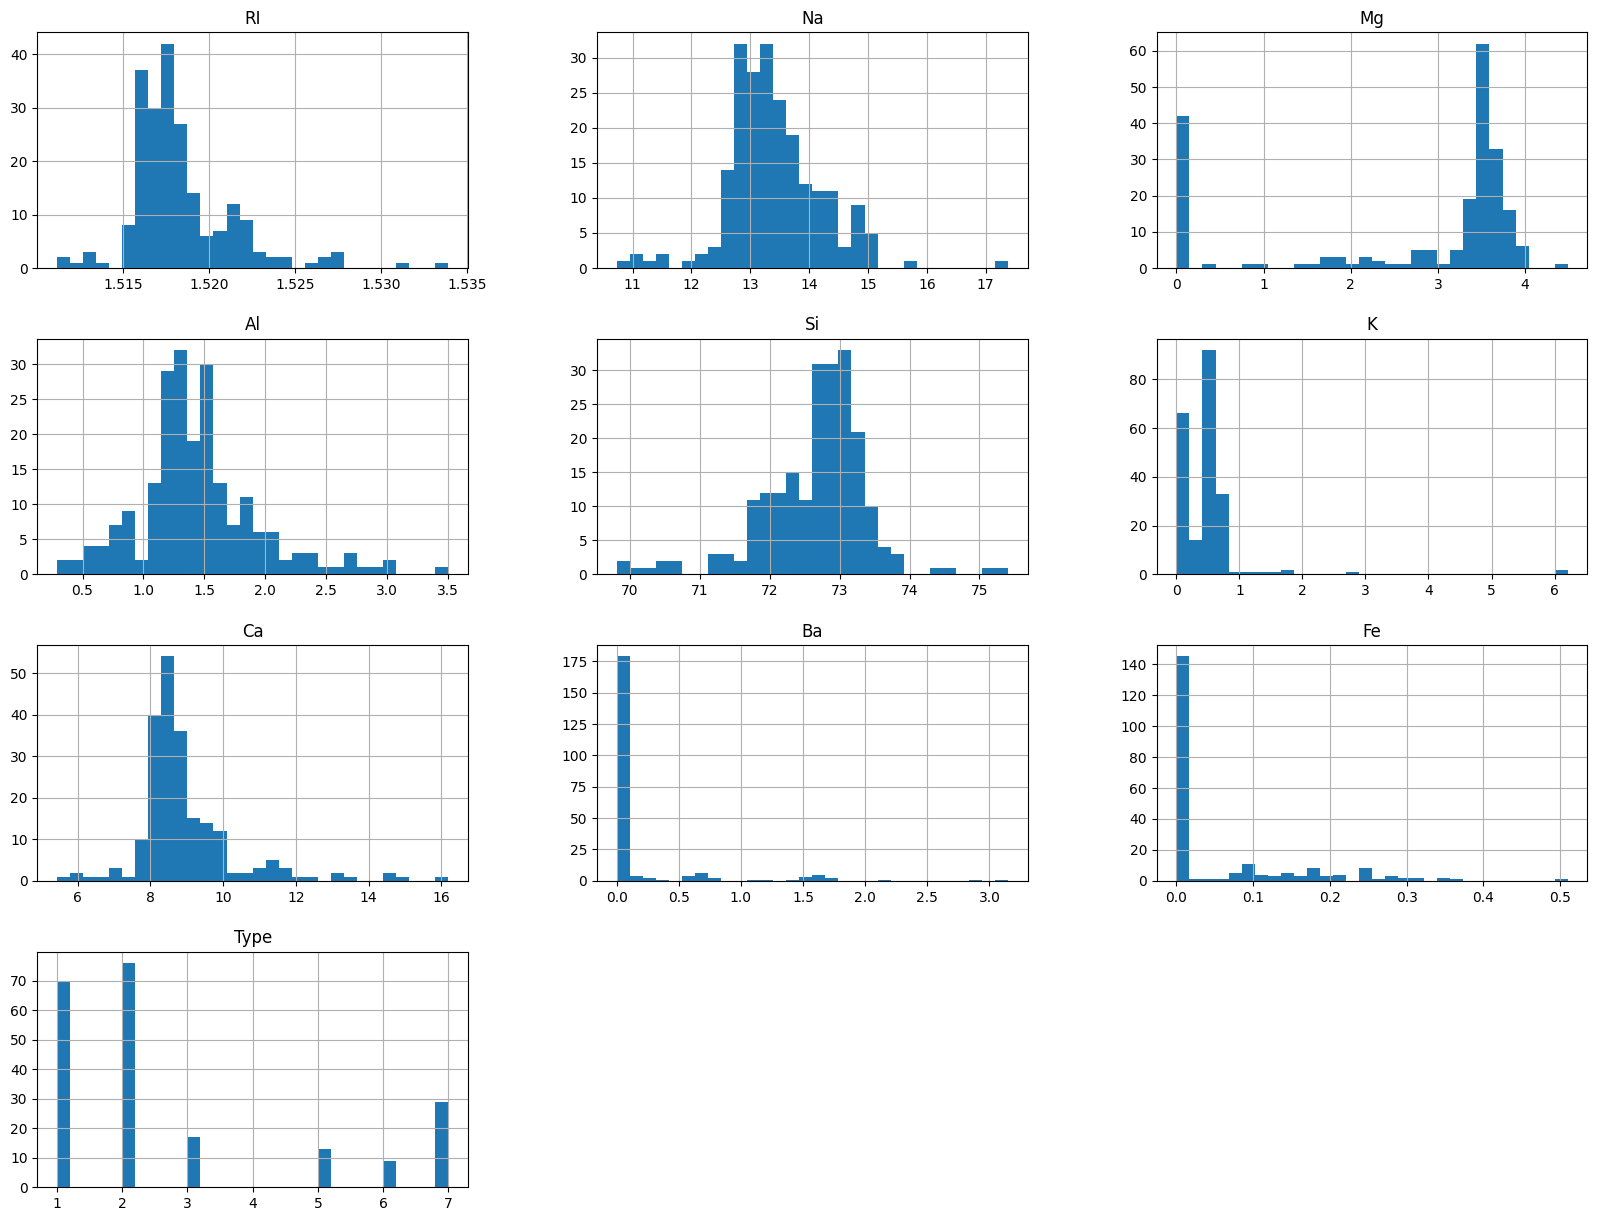

In [87]:
# Histograms
df.hist(bins=30, figsize=(20, 15))
plt.show()

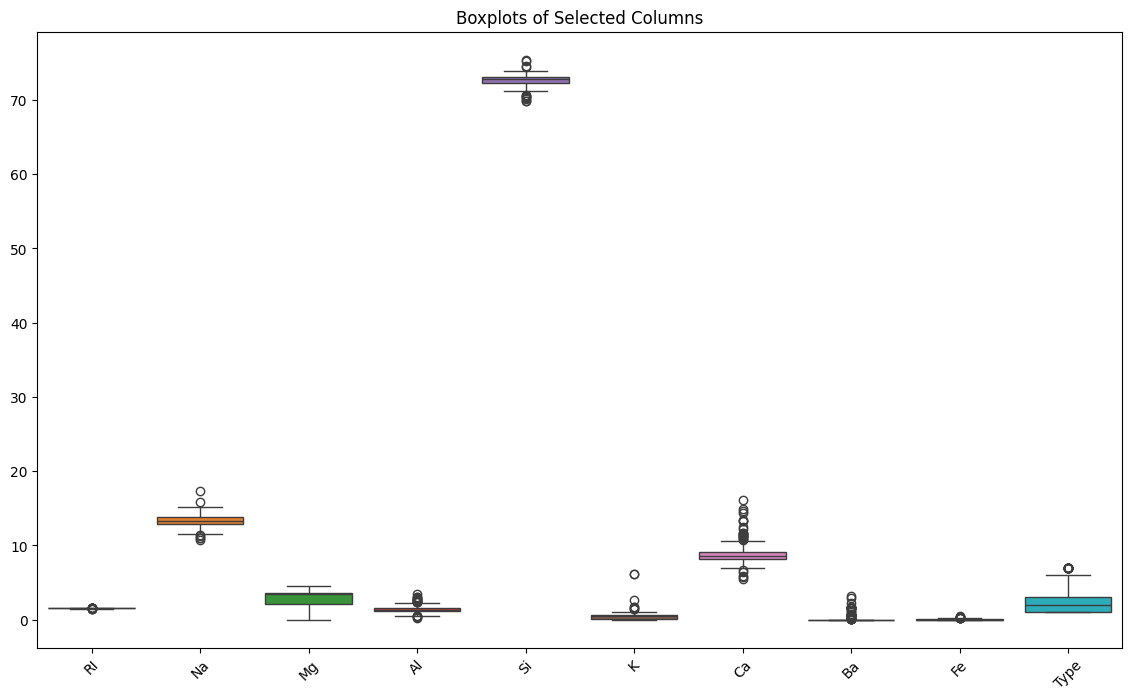

In [88]:
columns_to_plot = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[columns_to_plot])

plt.title('Boxplots of Selected Columns')
plt.xticks(rotation=45)
plt.show()

## **3: Data Preprocessing**

In [89]:
def cap_outliers(df):
    # List of numeric columns to check for outliers
    numeric_cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

    for col in numeric_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for capping
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

In [90]:
df = cap_outliers(df)

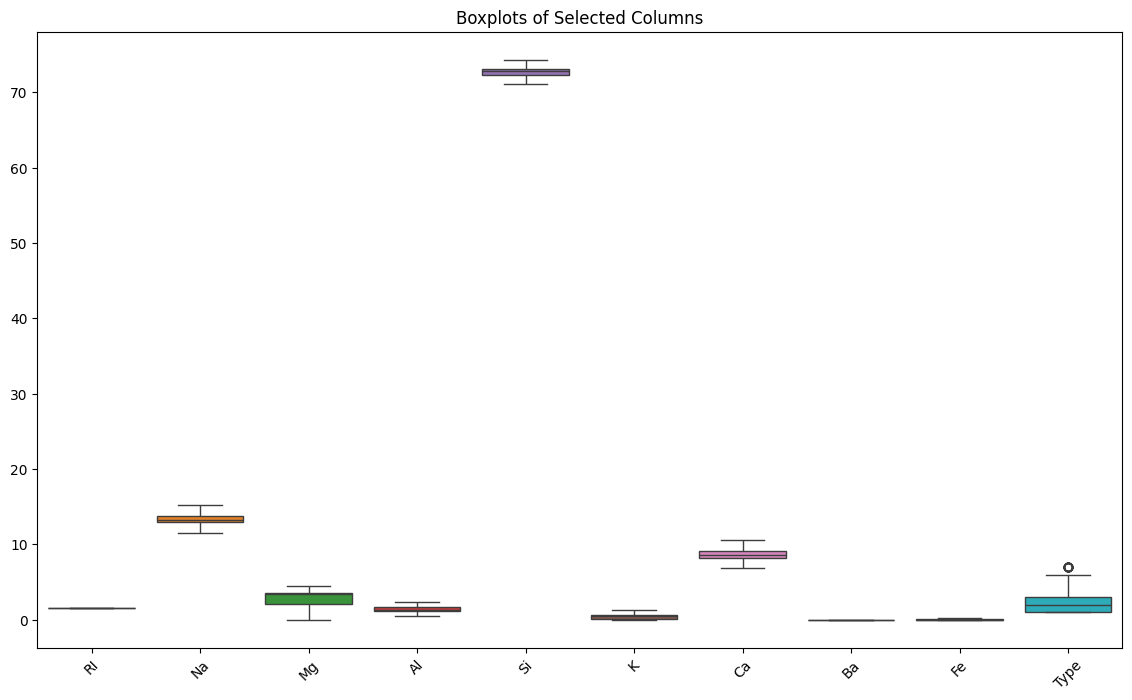

In [91]:
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[columns])

plt.title('Boxplots of Selected Columns')
plt.xticks(rotation=45)
plt.show()

## **4: Random Forest Model Implementation**

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [93]:
X = df.drop('Type', axis=1)  # Features
y = df['Type']  # Target

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [95]:
# Checking the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (171, 9)
X_test shape: (43, 9)
y_train shape: (171,)
y_test shape: (43,)


In [96]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [98]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [99]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [100]:
# Generate a classification report
report = classification_report(y_test, y_pred)

In [101]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [102]:
# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.77
Precision: 0.78
Recall: 0.77
F1 Score: 0.76

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.77      0.67      0.71        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.71      0.83      0.77         6

    accuracy                           0.77        43
   macro avg       0.79      0.71      0.74        43
weighted avg       0.78      0.77      0.76        43

Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 3 10  0  0  1  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  5]]


## **5: Bagging and Boosting Methods**

In [103]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [104]:
# Initialize and train the Random Forest model (Bagging)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

In [106]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

In [107]:
print("Random Forest (Bagging) Performance:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest (Bagging) Performance:
Accuracy: 0.77
Precision: 0.78
Recall: 0.77
F1 Score: 0.76

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.77      0.67      0.71        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.71      0.83      0.77         6

    accuracy                           0.77        43
   macro avg       0.79      0.71      0.74        43
weighted avg       0.78      0.77      0.76        43

Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 3 10  0  0  1  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  5]]


In [108]:
# Initialize and train the Gradient Boosting model (Boosting)
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [109]:
# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

In [110]:
# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

## **Additional Notes:**

**1. Explain Bagging and Boosting methods. How is it different from each other.**  
**Ans.**  
**Bagging (Bootstrap Aggregating)**

*   **Concept**: Bagging involves training multiple models (usually of the same type, such as decision trees) independently on different random subsets of the data, created by bootstrapping (sampling with replacement). The predictions from these models are then averaged (for regression) or voted upon (for classification) to produce the final prediction.
*   **Key Characteristics**:

1.   Parallel Training: Models are trained independently and in parallel.
2.   Reduces Variance: By averaging multiple models, bagging reduces the variance of the model and helps prevent overfitting.
3.   Example: Random Forests use bagging with decision trees.

*   How It Works:

1.   Create multiple bootstrapped subsets of the training data.
2.   Train a separate model on each subset.
3.   Aggregate the predictions (e.g., by voting or averaging).









**2. Explain how to handle imbalance in the data.**
**Ans.**  
**Boosting**

*   **Concept**: Boosting involves training models sequentially, where each new model focuses on correcting the errors of the previous models. Models are added to the ensemble one at a time, and each new model is weighted based on the errors made by the existing models.
*   **Key Characteristics**:

1.   Sequential Training: Models are trained sequentially, with each model learning from the mistakes of the previous ones.
2.   Reduces Bias: Boosting aims to reduce both bias and variance, leading to a more accurate model.
3.   Example: Gradient Boosting Machines (GBM) and AdaBoost are popular boosting algorithms.

*   How It Works:

1.   Train the first model on the data.
2.   Compute the errors and assign weights to the data points.
3.   Train the next model to correct the errors of the previous model.
4.   Combine the predictions of all models, usually with weighted averaging.

